In [2]:
import pandas
from IPython.display import display

df=pandas.read_json('raw_matches_dataset.json', dtype={'match_id': int, 'match_uuid': 'string', 'num_players': int,
                                                        'average_rating': int, 'cheats' : bool, 'game_type': int, 
                                                        'lock_speed': bool, 'lock_teams': bool, 'map_size': int, 'pop': int, 
                                                        'ranked': bool, 'map_type' : int, 'leaderboard_id': int, 
                                                        'rating_type': int, 'shared_exploration' : bool, 'team_together' : bool, 
                                                        'team_positions': bool, 'turbo' : bool, 'victory' : int, 
                                                        'victory_time' : int, 'visibility' : int, 'opened' : int, 
                                                        'started': int, 'finished' : int, 'players' : [dict]})
pandas.options.display.max_columns = None
df.dtypes

average_rating        float64
cheats                   bool
ending_age            float64
expansion             float64
finished              float64
full_tech_tree        float64
game_type             float64
has_custom_content    float64
has_password          float64
leaderboard_id          int64
lobby_id              float64
lock_speed               bool
lock_teams               bool
map_size              float64
map_type              float64
match_id                int64
match_uuid             object
name                   object
num_players             int64
num_slots               int64
opened                  int64
players                object
pop                   float64
ranked                   bool
rating_type             int64
resources             float64
rms                    object
scenario               object
server                 object
shared_exploration       bool
speed                 float64
started                 int64
starting_age          float64
team_posit

In [3]:
df['cheats']=df['cheats'].astype('category')
df['game_type']=df['game_type'].astype('category')
df['visibility']=df['visibility'].astype('category')
df['rating_type']=df['rating_type'].astype('category')
df['num_players']=df['num_players'].astype('category')
df['map_type']=df['map_type'].astype('category')
df['ranked']=df['ranked'].astype('category')
df['lock_teams']=df['lock_teams'].astype('category')
df['turbo']=df['turbo'].astype('category')
df['team_positions']=df['team_positions'].astype('category')
df['team_together']=df['team_together'].astype('category')

Multiplicamos por "speed", pois é a velocidade do jogo, que pode vir a variar de partida para partida, então decidimos usar o tempo que se passou dentro de cada partida do jogo. O tempo da partida pode variar entre: 1,7~2 * (tempo do mundo real).

In [4]:
df['duration']=((df['finished'] - df['started']) * df['speed'])/60

In [5]:
df_with_cheats=df[df['cheats'] == True]
df_without_cheats=df[df['cheats'] == False]

<AxesSubplot:>

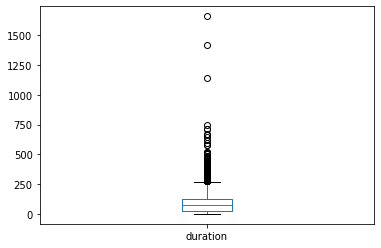

In [6]:
df_with_cheats['duration'].plot.box()

<AxesSubplot:>

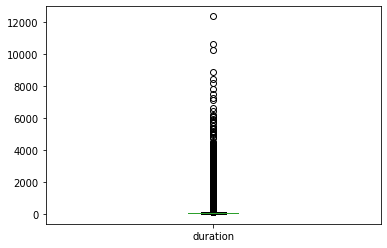

In [7]:
df_without_cheats['duration'].plot.box()

<AxesSubplot:>

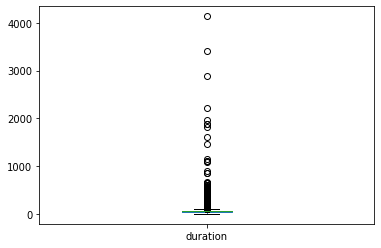

In [9]:
df_ranked=df_without_cheats[df_without_cheats['ranked'] == True]
df_unranked=df_without_cheats[df_without_cheats['ranked'] == False]

df_ranked['duration'].plot.box()

<AxesSubplot:>

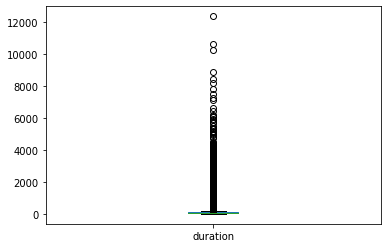

In [10]:
df_unranked['duration'].plot.box()

Visivelmente há bastante outliers no tempo de duração das partidas, pois 40.000 minutos é um tempo de  duração incomuns, a título de comparação: Um jogador famoso de Age of empires 2 comentou e publicou uma partida que durou 780 minutos(de tempo dentro do jogo) e a chamou de "The longest aoe2 game ever!".

Percebe-se também que as partidas "rankeadas" demonstram ter um menor número de outliers. Isso nos fez rememorar que partidas "rankeadas" são partidas competitivas, o que quer dizer que as pessoas as jogam com mais seriedade, o que traz dados mais certeiros quanto à qualidade da partida.

Abaixo, excluímos colunas irrelevantes para informar o andamento da partida ou colunas que já têm valores padronizados em partidas "rankeadas", além de fazer algumas filtragens para deixar as partidas no formato rankeadas de "mapa aleatório", que é o tipo de "rankeada" padrão.

In [11]:
print(str(len(df[df['average_rating'].isnull()])) + " " + str(len(df[df['average_rating'] >= 0])))

342745 57255


Average_rating é a média das classificações dos jogadores, uma informação as vezes útil, porém 5/6 das linhas
têm seu valor como NaN.

Nesse arquivo apenas excluo as colunas e filtro os dados advindos da API, no próximo arquivo "data_treatment" realizamos as detecções de outliers, o tratamento dos dados ausentes, a normalização e a discretização.

In [12]:
df=df[df['cheats'] == False]

df=df.drop('cheats', 1)

df=df.drop('average_rating', 1)

df=df.drop('expansion', 1)

df=df.drop('server', 1)

df=df.drop('name', 1)

In [13]:
df

,ending_age,finished,full_tech_tree,game_type,has_custom_content,has_password,leaderboard_id,lobby_id,lock_speed,lock_teams,map_size,map_type,match_id,match_uuid,num_players,num_slots,opened,players,pop,ranked,rating_type,resources,rms,scenario,shared_exploration,speed,started,starting_age,team_positions,team_together,treaty_length,turbo,version,victory,victory_time,visibility,duration
0,0.0,1.602092e+09,0.0,0.0,NaN,0.0,0,1.097752e+17,False,True,0.0,9.0,42282503,1aaf7b77-4ac7-e04f-87f5-f5025b8924dc,2,2,1602087371,"[{'civ': 29, 'clan': None, 'color': 2, 'countr...",200.0,False,0,0.0,None,None,False,2.0,1602087371,0.0,False,True,0.0,False,40874.0,9.0,1.0,0.0,152.966667
1,5.0,1.602089e+09,0.0,0.0,NaN,1.0,3,NaN,True,True,0.0,9.0,42282557,e6ddfae4-2971-ed45-8131-f8f4679c263e,2,2,1602087363,"[{'civ': 20, 'clan': None, 'color': 2, 'countr...",200.0,True,2,0.0,None,None,False,2.0,1602087363,0.0,True,True,0.0,False,40874.0,1.0,0.0,0.0,66.833333
2,5.0,1.602088e+09,0.0,0.0,NaN,1.0,3,NaN,True,True,0.0,9.0,42282607,efa324f3-cbba-fe46-91c1-2aa805e173a2,2,2,1602087378,"[{'civ': 28, 'clan': None, 'color': 2, 'countr...",200.0,True,2,0.0,None,None,False,2.0,1602087378,0.0,True,True,0.0,False,40874.0,1.0,0.0,0.0,19.900000
3,5.0,1.602088e+09,1.0,10.0,NaN,0.0,0,NaN,False,False,5.0,59.0,42281803,c9a19f8d-cd76-a647-a939-51e877032a20,2,2,1602087379,"[{'civ': 16, 'clan': None, 'color': 1, 'countr...",200.0,False,0,2.0,None,None,True,1.0,1602087379,4.0,True,True,0.0,False,40874.0,9.0,1.0,0.0,5.600000
4,0.0,1.602089e+09,0.0,0.0,NaN,0.0,0,NaN,True,True,2.0,9.0,42281072,93f1b07b-9c6f-f14f-b29d-0790ca91bf0c,4,4,1602087370,"[{'civ': 8, 'clan': None, 'color': 1, 'country...",200.0,False,0,0.0,None,None,False,1.0,1602087370,0.0,False,True,0.0,False,40874.0,9.0,1.0,0.0,29.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0.0,1.604963e+09,0.0,0.0,NaN,0.0,0,NaN,True,True,0.0,141.0,47896543,404fdeb0-f22f-1a43-8534-a491b947b68b,2,2,1604961388,"[{'civ': 22, 'clan': None, 'color': 1, 'countr...",200.0,False,0,0.0,None,None,False,2.0,1604961388,0.0,False,True,0.0,False,41855.0,9.0,1.0,0.0,49.900000
399996,5.0,1.604962e+09,0.0,0.0,NaN,1.0,3,NaN,True,True,0.0,9.0,47896537,8af937ef-9f44-8845-98b5-09b9e6fcefc5,2,2,1604961380,"[{'civ': 34, 'clan': None, 'color': 2, 'countr...",200.0,True,2,0.0,None,None,False,2.0,1604961380,0.0,True,True,0.0,False,41855.0,1.0,0.0,0.0,14.300000
399997,5.0,1.604963e+09,0.0,0.0,NaN,1.0,4,NaN,True,True,3.0,9.0,47896529,f549a407-541e-664b-ade5-f811f0b93a4f,6,6,1604961377,"[{'civ': 0, 'clan': None, 'color': 2, 'country...",200.0,True,4,0.0,None,None,False,2.0,1604961377,0.0,True,True,0.0,False,41855.0,1.0,0.0,0.0,63.133333
399998,0.0,1.604963e+09,0.0,3.0,NaN,0.0,0,NaN,True,True,0.0,9.0,47896139,7644a9bb-30ab-624d-bde7-d6a50a286d61,8,8,1604961388,"[{'civ': 4, 'clan': None, 'color': 1, 'country...",200.0,False,0,0.0,None,CBA KingTe Version3.aoe2scenario,True,3.0,1604961388,0.0,False,True,0.0,False,41855.0,9.0,14000.0,0.0,77.550000


In [14]:
df=df[df['pop'] == 200]

df=df.drop('pop', 1)

df=df[df['game_type'] == 0]

df=df.drop('game_type', 1)

df=df.drop('has_password', 1)

df=df.drop('map_size', 1)

In [15]:
df

,ending_age,finished,full_tech_tree,has_custom_content,leaderboard_id,lobby_id,lock_speed,lock_teams,map_type,match_id,match_uuid,num_players,num_slots,opened,players,ranked,rating_type,resources,rms,scenario,shared_exploration,speed,started,starting_age,team_positions,team_together,treaty_length,turbo,version,victory,victory_time,visibility,duration
0,0.0,1.602092e+09,0.0,NaN,0,1.097752e+17,False,True,9.0,42282503,1aaf7b77-4ac7-e04f-87f5-f5025b8924dc,2,2,1602087371,"[{'civ': 29, 'clan': None, 'color': 2, 'countr...",False,0,0.0,None,None,False,2.0,1602087371,0.0,False,True,0.0,False,40874.0,9.0,1.0,0.0,152.966667
1,5.0,1.602089e+09,0.0,NaN,3,NaN,True,True,9.0,42282557,e6ddfae4-2971-ed45-8131-f8f4679c263e,2,2,1602087363,"[{'civ': 20, 'clan': None, 'color': 2, 'countr...",True,2,0.0,None,None,False,2.0,1602087363,0.0,True,True,0.0,False,40874.0,1.0,0.0,0.0,66.833333
2,5.0,1.602088e+09,0.0,NaN,3,NaN,True,True,9.0,42282607,efa324f3-cbba-fe46-91c1-2aa805e173a2,2,2,1602087378,"[{'civ': 28, 'clan': None, 'color': 2, 'countr...",True,2,0.0,None,None,False,2.0,1602087378,0.0,True,True,0.0,False,40874.0,1.0,0.0,0.0,19.900000
4,0.0,1.602089e+09,0.0,NaN,0,NaN,True,True,9.0,42281072,93f1b07b-9c6f-f14f-b29d-0790ca91bf0c,4,4,1602087370,"[{'civ': 8, 'clan': None, 'color': 1, 'country...",False,0,0.0,None,None,False,1.0,1602087370,0.0,False,True,0.0,False,40874.0,9.0,1.0,0.0,29.583333
5,5.0,1.602088e+09,0.0,NaN,4,NaN,True,True,77.0,42282498,57cbd4d8-221e-a94d-bbd2-df7839333e5d,4,4,1602087374,"[{'civ': 4, 'clan': None, 'color': 6, 'country...",True,4,0.0,None,None,False,2.0,1602087374,0.0,True,True,0.0,False,40874.0,1.0,0.0,0.0,4.633333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399993,5.0,1.604964e+09,0.0,NaN,3,NaN,True,True,76.0,47896612,90bf8bd4-521b-d64f-b1bf-86237d3ee218,2,2,1604961382,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",True,2,0.0,None,None,False,2.0,1604961382,0.0,True,True,0.0,False,41855.0,1.0,0.0,0.0,74.400000
399994,5.0,1.604962e+09,0.0,NaN,3,NaN,True,True,9.0,47896606,1a2644ca-a25f-0340-ac41-51d5c3ef9067,2,2,1604961381,"[{'civ': 12, 'clan': None, 'color': 2, 'countr...",True,2,0.0,None,None,False,2.0,1604961381,0.0,True,True,0.0,False,41855.0,1.0,0.0,0.0,25.866667
399995,0.0,1.604963e+09,0.0,NaN,0,NaN,True,True,141.0,47896543,404fdeb0-f22f-1a43-8534-a491b947b68b,2,2,1604961388,"[{'civ': 22, 'clan': None, 'color': 1, 'countr...",False,0,0.0,None,None,False,2.0,1604961388,0.0,False,True,0.0,False,41855.0,9.0,1.0,0.0,49.900000
399996,5.0,1.604962e+09,0.0,NaN,3,NaN,True,True,9.0,47896537,8af937ef-9f44-8845-98b5-09b9e6fcefc5,2,2,1604961380,"[{'civ': 34, 'clan': None, 'color': 2, 'countr...",True,2,0.0,None,None,False,2.0,1604961380,0.0,True,True,0.0,False,41855.0,1.0,0.0,0.0,14.300000


In [16]:
df=df.drop('num_slots', 1)

df=df[df['lock_teams'] == True]

df=df.drop('lock_teams', 1)

df=df[df['ranked'] == True]

df=df.drop('ranked', 1)

df=df[df['turbo'] == False]

df=df.drop('turbo', 1)

df=df[df['team_positions']==True]

df=df.drop('team_positions', 1)

df=df[df['team_together']==True]

df=df.drop('team_together', 1)


df=df.drop('starting_age', 1)

df=df.drop('ending_age', 1)

df=df[df['full_tech_tree']==False]

df=df.drop('full_tech_tree', 1)

df=df.drop('has_custom_content', 1)

df=df.drop('lock_speed', 1)

df=df[df['speed']==2]

df=df.drop('speed', 1)

df=df.drop('version', 1)

df=df.drop('rms', 1)

df=df.drop('treaty_length', 1)

df=df[df['victory_time']==0]

df=df.drop('victory_time', 1)

df=df.drop('scenario', 1)

In [17]:
df.columns

Index(['finished', 'leaderboard_id', 'lobby_id', 'map_type', 'match_id',
       'match_uuid', 'num_players', 'opened', 'players', 'rating_type',
       'resources', 'shared_exploration', 'started', 'victory', 'visibility',
       'duration'],
      dtype='object')

In [18]:
df=df.drop('opened', 1)

df=df.drop('started', 1)
df=df.drop('finished', 1)

df=df.drop('resources', 1)

df=df.drop('shared_exploration', 1)

df=df.drop('victory', 1)

df=df.drop('leaderboard_id', 1)

df=df.drop('lobby_id', 1)

In [19]:
df

,map_type,match_id,match_uuid,num_players,players,rating_type,visibility,duration
1,9.0,42282557,e6ddfae4-2971-ed45-8131-f8f4679c263e,2,"[{'civ': 20, 'clan': None, 'color': 2, 'countr...",2,0.0,66.833333
2,9.0,42282607,efa324f3-cbba-fe46-91c1-2aa805e173a2,2,"[{'civ': 28, 'clan': None, 'color': 2, 'countr...",2,0.0,19.900000
5,77.0,42282498,57cbd4d8-221e-a94d-bbd2-df7839333e5d,4,"[{'civ': 4, 'clan': None, 'color': 6, 'country...",4,0.0,4.633333
6,9.0,42282609,4df380fb-954c-6e4e-861a-9b0894f6be16,2,"[{'civ': 5, 'clan': None, 'color': 2, 'country...",2,0.0,43.833333
8,29.0,42282481,1fb40655-3a85-cf46-bd8b-d2ac6b28aa0d,6,"[{'civ': 22, 'clan': None, 'color': 6, 'countr...",4,0.0,62.700000
...,...,...,...,...,...,...,...,...
399992,9.0,47896623,581948b9-421f-144a-b571-83d449151177,6,"[{'civ': 10, 'clan': None, 'color': 4, 'countr...",4,0.0,31.466667
399993,76.0,47896612,90bf8bd4-521b-d64f-b1bf-86237d3ee218,2,"[{'civ': 11, 'clan': None, 'color': 2, 'countr...",2,0.0,74.400000
399994,9.0,47896606,1a2644ca-a25f-0340-ac41-51d5c3ef9067,2,"[{'civ': 12, 'clan': None, 'color': 2, 'countr...",2,0.0,25.866667
399996,9.0,47896537,8af937ef-9f44-8845-98b5-09b9e6fcefc5,2,"[{'civ': 34, 'clan': None, 'color': 2, 'countr...",2,0.0,14.300000


In [20]:
df.columns

Index(['map_type', 'match_id', 'match_uuid', 'num_players', 'players',
       'rating_type', 'visibility', 'duration'],
      dtype='object')

In [21]:
df.to_json("matches_dataset_filtered.json")